In [50]:
import sys
!{sys.executable} -m pip install matplotlib


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
import pickle
import os

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

# 下载NLTK资源


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\liuzu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\liuzu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\liuzu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


训练集大小: (1557, 2)
验证集大小: (334, 2)
测试集大小: (334, 3)


c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38598 (\N{CJK UNIFIED IDEOGRAPH-96C6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py

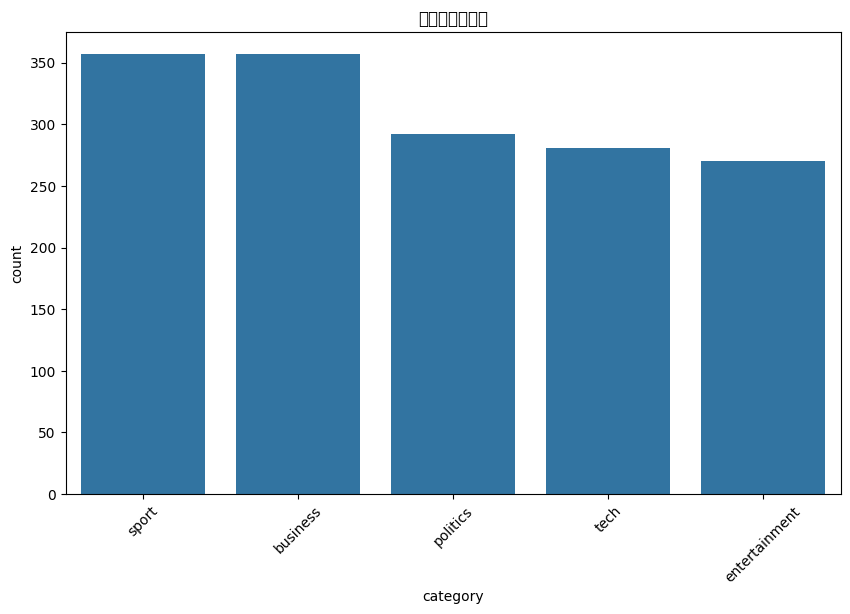

c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 21035 (\N{CJK UNIFIED IDEOGRAPH-522B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\IPython\core\pylabtools.py

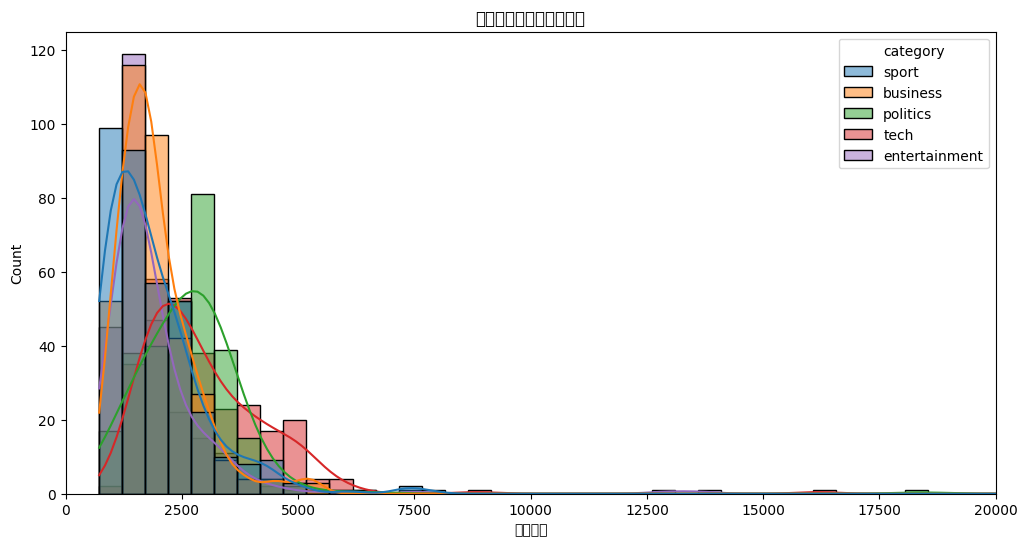


类别: sport
Connors' rallying cry for British tennis

"Do you have it in your heart? How much guts do you have? How much do you hate to lose?"

These are the questions Jimmy Connors will be asking of Britain's brightest tennis hopes in the months, and possibly years, to come. The American legend swept into London on Thursday to announce a "long-term" relationship with the Lawn Tennis Association after spending three days at the Elite Performance winter camp in La Manga. And the man who epitomised the phrase ...

类别: business
Euronext joins bid battle for LSE

Pan-European stock market Euronext has approached the London Stock Exchange (LSE) about a possible takeover bid.

"The approach is at an early stage and therefore does not require a response at this point," LSE said. Talks with the European stock market and with rival bidder Deutsche Boerse will continue, the LSE said. Last week, the group rejected a Â£1.3bn ($2.5bn) takeover offer from Deutsche Boerse, claiming that it undervalued

In [53]:
# 加载数据
train_df = pd.read_csv('../data/processed/train.csv')
val_df = pd.read_csv('../data/processed/val.csv')
test_df = pd.read_csv('../data/processed/test.csv')

print(f"训练集大小: {train_df.shape}")
print(f"验证集大小: {val_df.shape}")
print(f"测试集大小: {test_df.shape}")

# 查看类别分布
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=train_df)
plt.title('训练集类别分布')
plt.xticks(rotation=45)
plt.show()

# 文本长度分析
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data=train_df, x='text_length', hue='category', bins=50, kde=True)
plt.title('不同类别的文本长度分布')
plt.xlabel('文本长度')
plt.xlim(0, 20000)
plt.show()

# 查看文本示例
for category in train_df['category'].unique():
    print(f"\n类别: {category}")
    print("=" * 50)
    print(train_df[train_df['category'] == category]['text'].iloc[0][:500], "...")
    print("=" * 50)

In [54]:
# 停用词列表
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # 转换为小写
    text = text.lower()
    # 删除标点和特殊字符
    text = re.sub(r'[^\w\s]', '', text)
    # 简单分词
    words = text.split()
    # 删除停用词和词形还原
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

train_df['processed_text'] = train_df['text'].apply(preprocess_text)
val_df['processed_text'] = val_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

test_df.to_csv('../data/processed/test.csv', index=False)


训练 MultinomialNB...
MultinomialNB 验证集准确率: 0.9820
               precision    recall  f1-score   support

     business       0.97      0.99      0.98        76
entertainment       1.00      0.97      0.98        58
     politics       0.95      0.95      0.95        63
        sport       1.00      1.00      1.00        77
         tech       0.98      1.00      0.99        60

     accuracy                           0.98       334
    macro avg       0.98      0.98      0.98       334
 weighted avg       0.98      0.98      0.98       334



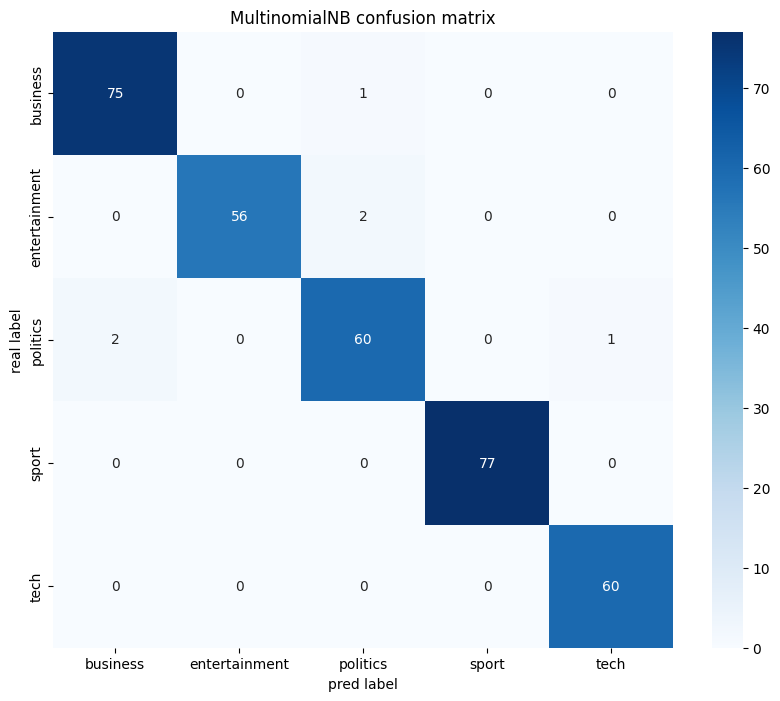


训练 LogisticRegression...
LogisticRegression 验证集准确率: 0.9731
               precision    recall  f1-score   support

     business       0.96      0.99      0.97        76
entertainment       0.98      0.97      0.97        58
     politics       0.94      0.94      0.94        63
        sport       1.00      1.00      1.00        77
         tech       0.98      0.97      0.97        60

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334



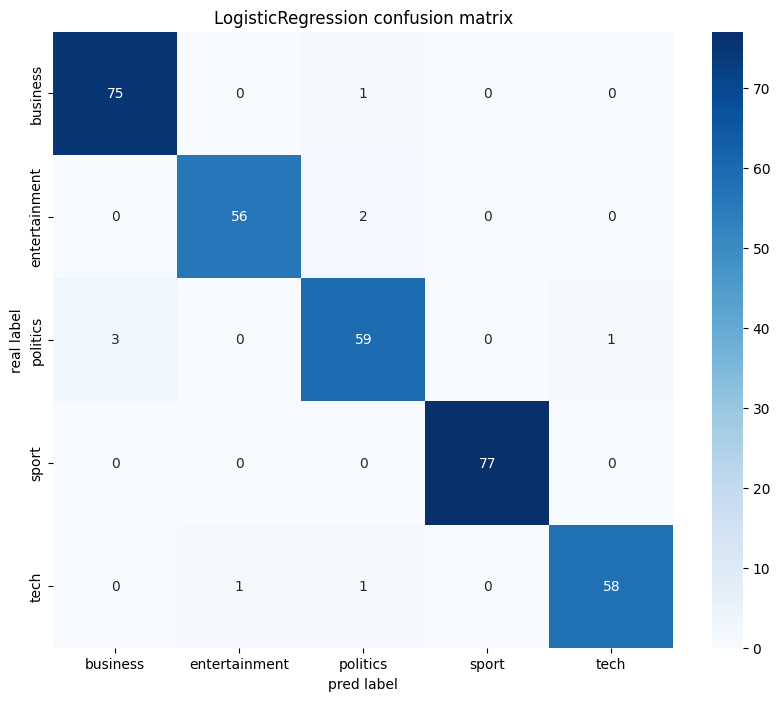


训练 LinearSVC...
LinearSVC 验证集准确率: 0.9701
               precision    recall  f1-score   support

     business       0.95      0.99      0.97        76
entertainment       0.98      0.97      0.97        58
     politics       0.94      0.94      0.94        63
        sport       1.00      1.00      1.00        77
         tech       0.98      0.95      0.97        60

     accuracy                           0.97       334
    macro avg       0.97      0.97      0.97       334
 weighted avg       0.97      0.97      0.97       334



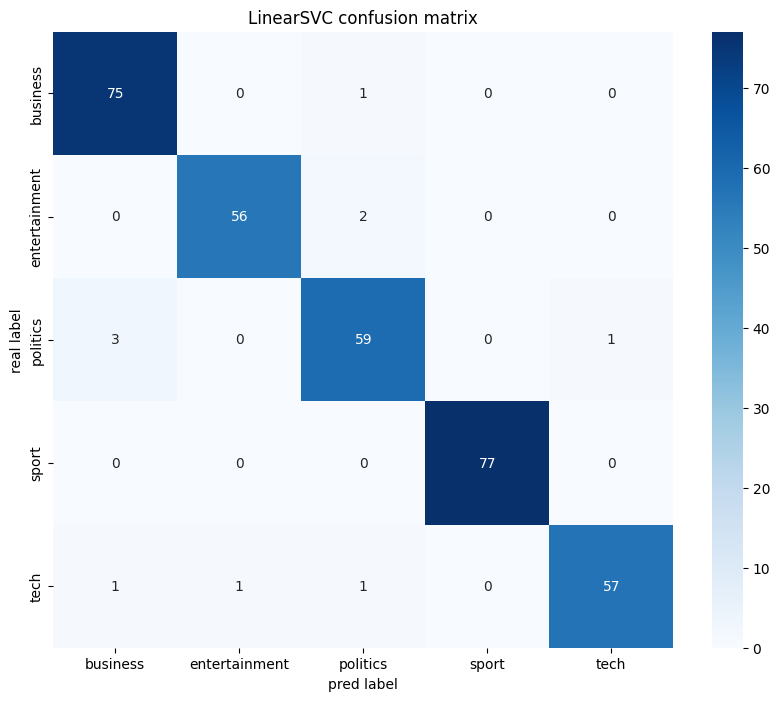


最佳模型是 MultinomialNB，准确率: 0.9820


In [55]:
def evaluate_model(model, X_val, y_val, model_name):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f"{model_name} 验证集准确率: {accuracy:.4f}")
    print(classification_report(y_val, y_pred))
    
    # 绘制混淆矩阵
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=sorted(train_df['category'].unique()), 
                yticklabels=sorted(train_df['category'].unique()))
    plt.xlabel('pred label')
    plt.ylabel('real label')
    plt.title(f'{model_name} confusion matrix')
    plt.show()
    
    return accuracy, y_pred

# 尝试不同的TF-IDF参数
tfidf = TfidfVectorizer(max_features=10000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(train_df['processed_text'])
X_val_tfidf = tfidf.transform(val_df['processed_text'])

# 尝试不同的分类器
models = {
    'MultinomialNB': MultinomialNB(),
    'LogisticRegression': LogisticRegression(max_iter=1000, C=10),
    'LinearSVC': LinearSVC(C=1, dual=False, max_iter=10000),
}

results = {}
for name, model in models.items():
    print(f"\n训练 {name}...")
    model.fit(X_train_tfidf, train_df['category'])
    acc, _ = evaluate_model(model, X_val_tfidf, val_df['category'], name)
    results[name] = acc

# 找出最佳模型
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]
print(f"\n最佳模型是 {best_model_name}，准确率: {results[best_model_name]:.4f}")

# 保存最佳TF-IDF模型
best_pipeline = Pipeline([
    ('tfidf', tfidf),
    ('clf', best_model)
])

with open('../models/best_tfidf_model.pkl', 'wb') as f:
    pickle.dump(best_pipeline, f)

Epoch 1/10


c:\Users\liuzu\news_classifier\news_env_new\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


49/49 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.2479 - loss: 1.5929 - val_accuracy: 0.4581 - val_loss: 1.2002
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 132s 3s/step - accuracy: 0.5253 - loss: 1.1147 - val_accuracy: 0.7964 - val_loss: 0.6240
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8498 - loss: 0.5173 - val_accuracy: 0.9251 - val_loss: 0.2781
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.9803 - loss: 0.1318 - val_accuracy: 0.9162 - val_loss: 0.2633
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.9906 - loss: 0.0774 - val_accuracy: 0.9431 - val_loss: 0.2572
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9935 - loss: 0.0473 - val_accuracy: 0.9162 - val_loss: 0.4290
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.9997 - loss: 0.0225 - val_accuracy: 0.9371 - val_loss: 0.3389
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 1.0000 - loss: 0.0160 - val_accuracy: 0.9431 - val_loss: 0.3559
Ep

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, 1000, 128)      │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 1000, 128)      │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,273,553 (16.30 MB)

 Trainable params: 1,424,517 (5.43 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,849,036 (10.87 MB)

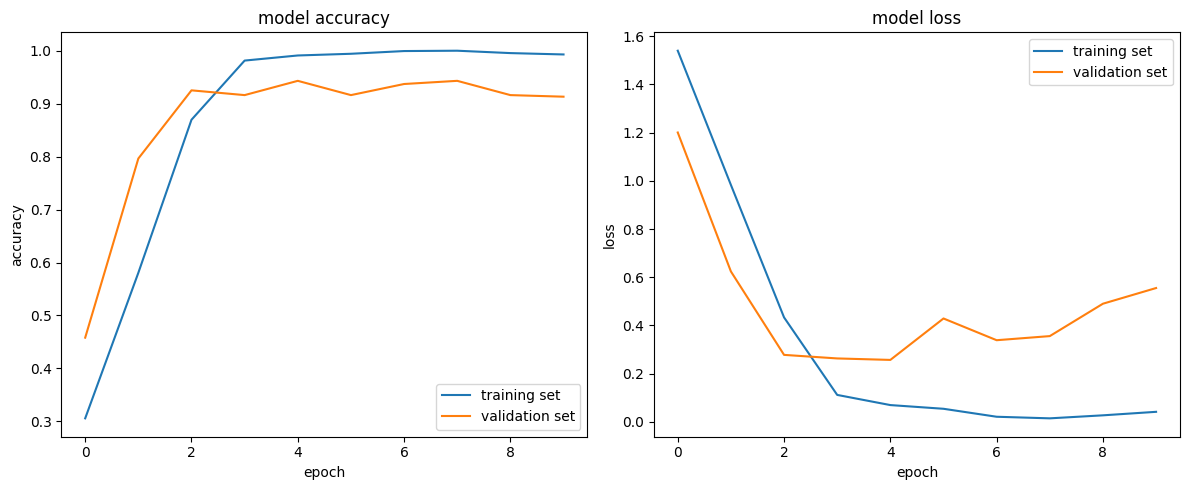

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 356ms/step - accuracy: 0.9055 - loss: 0.6053
validation accuracy rate: 0.9132
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 336ms/step
               precision    recall  f1-score   support

     business       0.90      0.93      0.92        76
entertainment       0.93      0.88      0.90        58
     politics       0.94      0.78      0.85        63
        sport       0.96      0.99      0.97        77
         tech       0.84      0.97      0.90        60

     accuracy                           0.91       334
    macro avg       0.91      0.91      0.91       334
 weighted avg       0.92      0.91      0.91       334



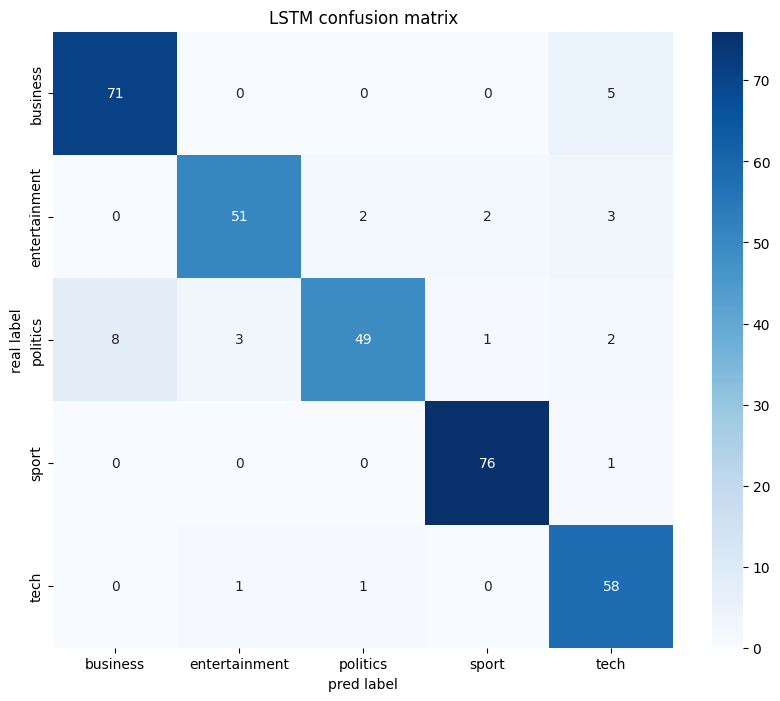

In [56]:
# 准备深度学习模型的数据
max_words = 10000
max_len = 1000

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_df['processed_text'])

X_train_seq = tokenizer.texts_to_sequences(train_df['processed_text'])
X_val_seq = tokenizer.texts_to_sequences(val_df['processed_text'])

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

# 将类别转换为数字
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_enc = le.fit_transform(train_df['category'])
y_val_enc = le.transform(val_df['category'])

# 构建LSTM模型
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_len))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# 训练模型
history = model.fit(
    X_train_pad, y_train_enc,
    epochs=10,
    batch_size=32,
    validation_data=(X_val_pad, y_val_enc),
    verbose=1
)

model.summary()

# 绘制训练过程
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set', 'validation set'], loc='upper right')
plt.tight_layout()
plt.show()

# 评估LSTM模型
val_loss, val_acc = model.evaluate(X_val_pad, y_val_enc)
print(f'validation accuracy rate: {val_acc:.4f}')

# 预测验证集
y_pred_prob = model.predict(X_val_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

# 分类报告
print(classification_report(y_val_enc, y_pred, target_names=le.classes_))

# 混淆矩阵
cm = confusion_matrix(y_val_enc, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_,
            yticklabels=le.classes_)
plt.xlabel('pred label')
plt.ylabel('real label')
plt.title('LSTM confusion matrix')
plt.show()




In [57]:
# 创建保存目录（如果不存在）
import os
os.makedirs('../models', exist_ok=True)

# 保存模型（使用.keras扩展名）
model.save('../models/lstm_model.keras')

# 保存tokenizer和标签编码器
with open('../models/tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
    
with open('../models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [58]:
model.export('../models/lstm_model')

INFO:tensorflow:Assets written to: ../models/lstm_model\assets


INFO:tensorflow:Assets written to: ../models/lstm_model\assets


Saved artifact at '../models/lstm_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 1000), dtype=tf.float32, name='keras_tensor_112')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  2420893418416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420894301728: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893424048: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893430208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893418240: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893432848: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420961623232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420890900560: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893678784: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893428800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2420893672448: TensorSpec(shape=(

错误分类的实例数量: 6

按类别统计的错误:
        category predicted  count
1  entertainment  politics      2
2       politics  business      2
0       business  politics      1
3       politics      tech      1

错误实例示例:

真实类别: entertainment, 预测类别: politics
--------------------------------------------------
Kidman wins photographer battle

Actress Nicole Kidman has won a restraining order against two paparazzi photographers who she claims left her fearful of leaving her Sydney mansion.

The Oscar-winning star took action against Jamie Fawcett and Ben McDonald after a bugging device was found outside he ...
--------------------------------------------------

真实类别: politics, 预测类别: tech
--------------------------------------------------
UK firms 'embracing e-commerce'

UK firms are embracing internet trading opportunities as never before, e-commerce minister Mike O'Brien says.

A government-commissioned study ranked the UK third in its world index of use of information and communication technology (ICT). T

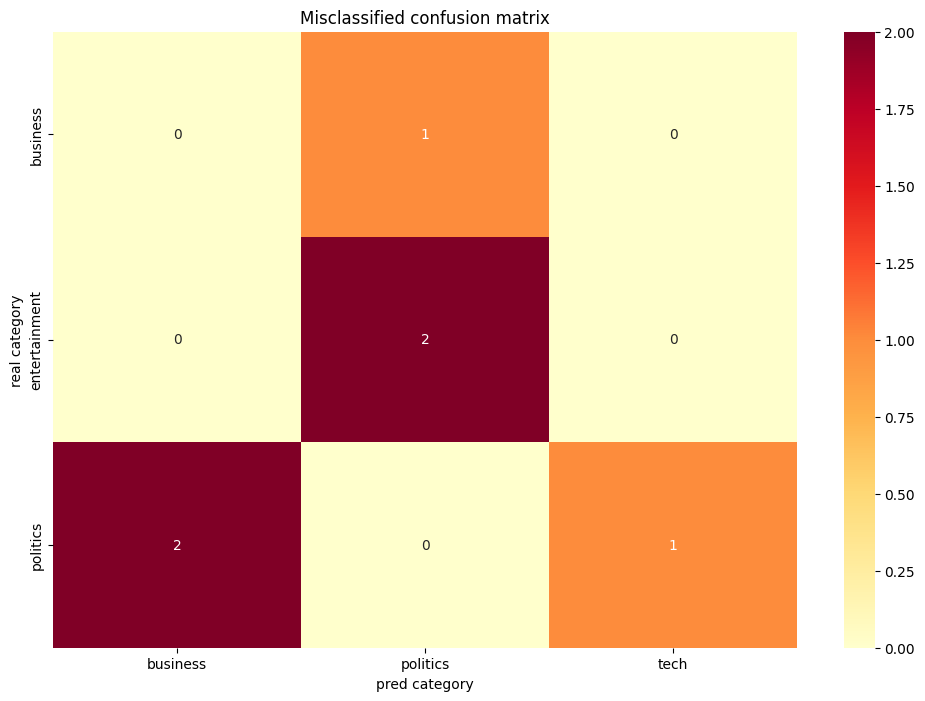

In [59]:
# 使用最佳模型在验证集上进行预测
y_pred = best_pipeline.predict(val_df['processed_text'])

# 找出错误分类的实例
errors = val_df[val_df['category'] != y_pred].copy()
errors['predicted'] = y_pred[val_df['category'] != y_pred]

print(f"错误分类的实例数量: {len(errors)}")

# 按类别统计错误
error_counts = errors.groupby(['category', 'predicted']).size().reset_index(name='count')
error_counts = error_counts.sort_values('count', ascending=False)

print("\n按类别统计的错误:")
print(error_counts.head(10))

# 分析错误实例的一些示例
print("\n错误实例示例:")
for i, row in errors.head(5).iterrows():
    print(f"\n真实类别: {row['category']}, 预测类别: {row['predicted']}")
    print("-" * 50)
    print(row['text'][:300], "...")
    print("-" * 50)

# 分析最容易混淆的类别对
plt.figure(figsize=(12, 8))
confusion = pd.crosstab(errors['category'], errors['predicted'])
sns.heatmap(confusion, annot=True, fmt='d', cmap='YlOrRd')
plt.title('Misclassified confusion matrix')
plt.xlabel('pred category')
plt.ylabel('real category')
plt.show()

In [60]:
# 使用LSTM和最佳TF-IDF模型的预测结果进行融合
def get_tfidf_predictions(model, texts):
    return model.predict_proba(texts)

def get_lstm_predictions(model, texts, tokenizer, max_len):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_len)
    return model.predict(padded)

# 加载保存的LSTM模型
lstm_model = tf.keras.models.load_model('../models/lstm_model.keras')

# 生成两个模型的预测概率
tfidf_model = best_pipeline.named_steps['clf']
tfidf_vectorizer = best_pipeline.named_steps['tfidf']
X_val_tfidf = tfidf_vectorizer.transform(val_df['processed_text'])

if hasattr(tfidf_model, 'predict_proba'):
    tfidf_probs = tfidf_model.predict_proba(X_val_tfidf)
else:
    # 如果模型没有predict_proba方法（如LinearSVC），使用decision_function
    decision_values = tfidf_model.decision_function(X_val_tfidf)
    # 转换为概率（简化处理）
    tfidf_probs = np.exp(decision_values) / np.sum(np.exp(decision_values), axis=1, keepdims=True)

lstm_probs = get_lstm_predictions(lstm_model, val_df['processed_text'], tokenizer, max_len)

# 融合预测（简单平均）
ensemble_probs = (tfidf_probs + lstm_probs) / 2
ensemble_preds = np.argmax(ensemble_probs, axis=1)

# 将数字标签转换回原始类别
ensemble_preds_labels = le.inverse_transform(ensemble_preds)

# 评估融合模型
ensemble_accuracy = accuracy_score(val_df['category'], ensemble_preds_labels)
print(f"融合模型准确率: {ensemble_accuracy:.4f}")
print(classification_report(val_df['category'], ensemble_preds_labels))

# 创建一个简单的融合函数，用于后续预测
def ensemble_predict(text, tfidf_pipeline, lstm_model, tokenizer, label_encoder, max_len=1000):
    # 预处理文本
    processed_text = preprocess_text(text)
    
    # TF-IDF模型预测
    tfidf_model = tfidf_pipeline.named_steps['clf']
    tfidf_vectorizer = tfidf_pipeline.named_steps['tfidf']
    X_tfidf = tfidf_vectorizer.transform([processed_text])
    
    if hasattr(tfidf_model, 'predict_proba'):
        tfidf_probs = tfidf_model.predict_proba(X_tfidf)[0]
    else:
        decision_values = tfidf_model.decision_function(X_tfidf)[0]
        tfidf_probs = np.exp(decision_values) / np.sum(np.exp(decision_values))
    
    # LSTM模型预测
    sequences = tokenizer.texts_to_sequences([processed_text])
    padded = pad_sequences(sequences, maxlen=max_len)
    lstm_probs = lstm_model.predict(padded)[0]
    
    # 融合预测
    ensemble_probs = (tfidf_probs + lstm_probs) / 2
    ensemble_pred = np.argmax(ensemble_probs)
    
    # 转换回类别名称
    return label_encoder.inverse_transform([ensemble_pred])[0], ensemble_probs


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 326ms/step
融合模型准确率: 0.9162
               precision    recall  f1-score   support

     business       0.90      0.93      0.92        76
entertainment       0.93      0.90      0.91        58
     politics       0.94      0.78      0.85        63
        sport       0.96      0.99      0.97        77
         tech       0.85      0.97      0.91        60

     accuracy                           0.92       334
    macro avg       0.92      0.91      0.91       334
 weighted avg       0.92      0.92      0.92       334



In [61]:
# 保存融合模型预测函数
import inspect
with open('../models/ensemble_predict_func.py', 'w', encoding='utf-8') as f:
    f.write(inspect.getsource(ensemble_predict))
    f.write('\n')
    f.write(inspect.getsource(preprocess_text))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13

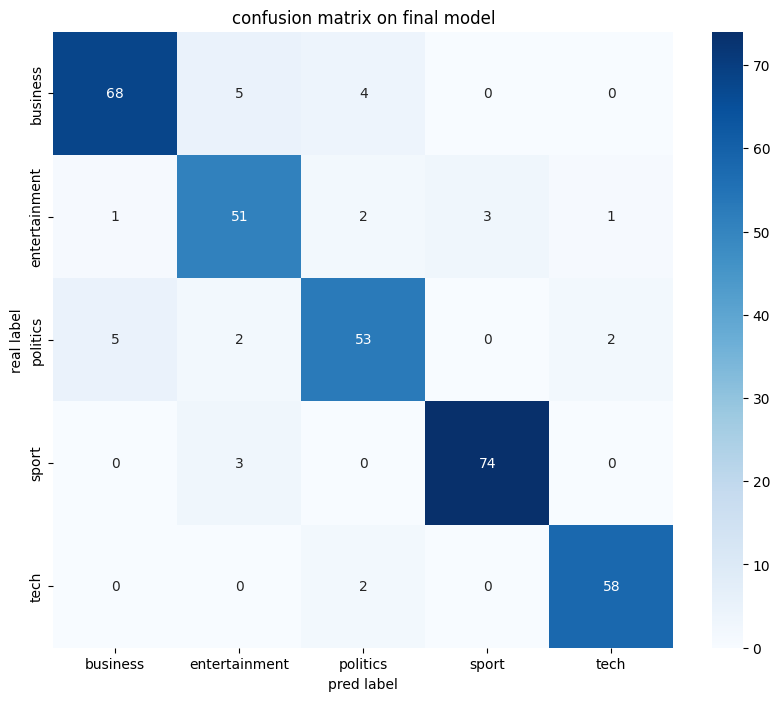

In [62]:
# 在测试集上评估最终模型
# 加载测试集
test_df = pd.read_csv('../data/processed/test.csv')

# 使用融合模型在测试集上进行预测
from tensorflow.keras.models import load_model

# 加载所有需要的模型和工具
tfidf_pipeline = pickle.load(open('../models/best_tfidf_model.pkl', 'rb'))
lstm_model = tf.keras.models.load_model('../models/lstm_model.keras')
tokenizer = pickle.load(open('../models/tokenizer.pkl', 'rb'))
label_encoder = pickle.load(open('../models/label_encoder.pkl', 'rb'))

# 测试集预测
y_test_pred = []
for text in test_df['processed_text']:
    pred, _ = ensemble_predict(text, tfidf_pipeline, lstm_model, tokenizer, label_encoder)
    y_test_pred.append(pred)

# 评估测试集性能
test_accuracy = accuracy_score(test_df['category'], y_test_pred)
print(f"测试集准确率: {test_accuracy:.4f}")
print(classification_report(test_df['category'], y_test_pred))

# 混淆矩阵
cm = confusion_matrix(test_df['category'], y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(test_df['category'].unique()),
            yticklabels=sorted(test_df['category'].unique()))
plt.xlabel('pred label')
plt.ylabel('real label')
plt.title('confusion matrix on final model')
plt.show()